# Pdf of the log

- Use numpy to draw N (where is large...) random samples from a uniform distribution between 0.1 and 10, and store these samples as x.

- Use matplotlib to make a histogram of these samples.
- Compute the base-10 log of your array x, and store this as y.
- Make another histogram for y. Using the equation to transform probability distributions, write what the theoretical pdf of y is, and overplot it onto your histogram.
- Compute the log of the mean of x and the mean of y. Now compute the log of the median of x and the median of y.

You should note that the means are different, but the medians (as it is a cumulative statistic) are the same. The mean is affected by the scale of the sample values, but the median only depends on the ordering of the samples. Monotonic transformations (like taking the log) do not change the ordering of samples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(0.1, 10, 10000)

Text(0.5, 1.0, 'Probability distribution of $x$')

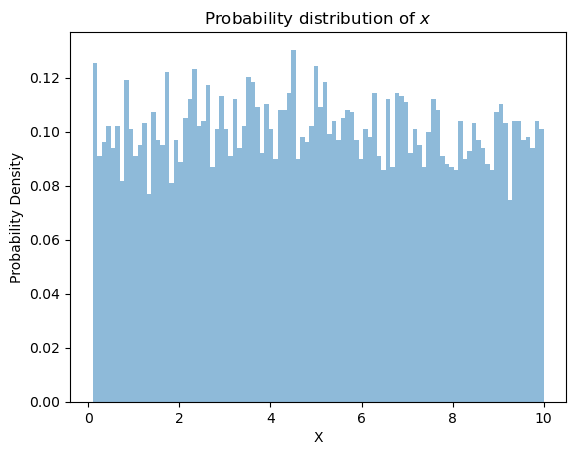

In [3]:
plt.hist(x, 100, density=True, alpha=0.5, edgecolor='none')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title(fr'Probability distribution of $x$')

Now I compute the base-10 log of the $x$ array and we store it as $y$.

In [4]:
y = np.log10(x)

I make another histogram for the $y$ distribution.

Text(0.5, 1.0, 'Probability distribution of $y$')

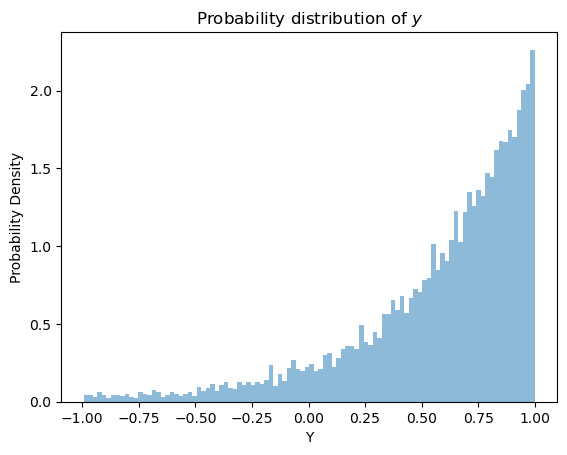

In [5]:
plt.hist(y, 100, density=True, alpha=0.5, edgecolor='none')
plt.xlabel('Y')
plt.ylabel('Probability Density')
plt.title(fr'Probability distribution of $y$')

I have to find out what the theoretical pdf of $y$ would be.
The equation is

$$
    p(y) = \left| \frac{dx}{dy} \right| p(x)
$$

In this case, $x$ has a uniform distribution, meaning that

$$
    p(x) = \frac{1}{10-0.1} = \frac{1}{9.9}
$$

From the fact that $y = \log_{10}{x}$, I obtain that $x = 10^y$, and this means that (using the chain derivative rule):

$$
    \left| \frac{dx}{dy} \right| = 10^y \ln{(10)}
$$

and by putting all together, I find in the end:

$$
    p(y) = \frac{10^y \ln{(10)}}{9.9}
$$

In [6]:
z = np.linspace(-1, 1, 10000)
p_y = 10**z * np.log(10) / (9.9)

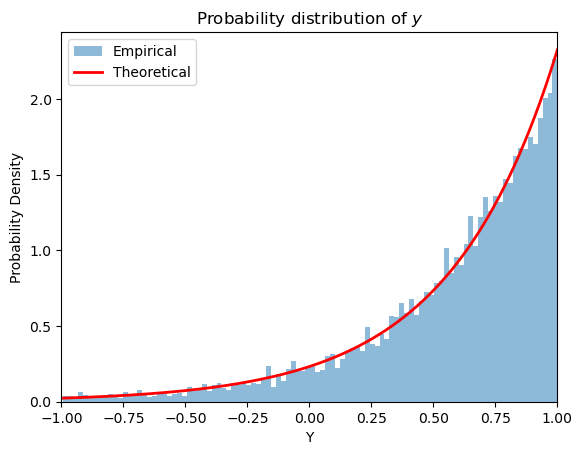

In [8]:
plt.hist(y, 100, density=True, alpha=0.5, edgecolor='none', label='Empirical')
plt.plot(z, p_y, color='red', linewidth=2, label='Theoretical')
plt.xlabel('Y')
plt.ylabel('Probability Density')
plt.xlim(-1,1)
plt.title(fr'Probability distribution of $y$')
plt.legend()

Compute the log of the mean of x and the mean of y. Now compute the log of the median of x and the median of y.

In [9]:
x_mean = np.mean(x)
log_x_mean = np.log10(x_mean)
y_mean = np.mean(y)

x_median = np.median(x)
log_x_median = np.log10(x_median)
y_median = np.median(y)
print('Log10 of the mean of x:   ', log_x_mean)
print('Mean of y:                ', y_mean)
print('---------------------------------------------')
print('Log10 of the median of x: ', log_x_median)
print('Median of y:              ', y_median)

Log10 of the mean of x:    0.6997108821606235
Mean of y:                 0.5830566213298234
---------------------------------------------
Log10 of the median of x:  0.6971625069577985
Median of y:               0.6971625068447282
